In [1]:
import pandas as pd
import numpy as np
import random
import copy
import math

from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
excel = pd.ExcelFile("data_cleaned.xlsx")
data = excel.parse(0)

In [3]:
# remove unnamed column
for i in data:
    if i.startswith('Unnamed') or i.startswith('CLINICAL OUTCOMES') or i.startswith('AUTO-CT'):
        data.pop(i)
    
data1 = data.dropna(axis = 0,how='all') # Remove Rows with All NAS

In [4]:
# print column name with corresponding number
for count, name in enumerate(data1):
    print(f'{count}:"{name}",')

0:"Clinical F/U interval  [d from CT]",
1:"BMI",
2:"BMI >30",
3:"Sex",
4:"Age at CT",
5:"Tobacco",
6:"FRS 10-year risk (%)",
7:"FRAX 10y Fx Prob (Orange-w/ DXA)",
8:"FRAX 10y Hip Fx Prob (Orange-w/ DXA)",
9:"Met Sx",
10:"AA_FLAG",
11:"L1_HU_BMD",
12:"TAT Area (cm2)",
13:"Total Body                Area EA (cm2)",
14:"VAT Area (cm2)",
15:"SAT Area (cm2)",
16:"VAT/SAT     Ratio",
17:"Muscle HU",
18:" Muscle Area (cm2)",
19:"L3 SMI (cm2/m2)",
20:"AoCa        Agatston",
21:"Liver HU    (Median)",
22:"CARD_FLAG",
23:"DIA_FLAG",
24:"FEM_FLAG",
25:"ALZ_FLAG",
26:"CANCER_FLAG",
27:"OUTCOME_FLAGS",
28:"DEATH_FLAG",


In [5]:
# define a lookup table for the column
columns = {0:"Clinical F/U interval  [d from CT]",
1:"BMI",
2:"BMI >30",
3:"Sex",
4:"Age at CT",
5:"Tobacco",
6:"FRS 10-year risk (%)",
7:"FRAX 10y Fx Prob (Orange-w/ DXA)",
8:"FRAX 10y Hip Fx Prob (Orange-w/ DXA)",
9:"Met Sx",
10:"AA_FLAG",
11:"L1_HU_BMD",
12:"TAT Area (cm2)",
13:"Total Body                Area EA (cm2)",
14:"VAT Area (cm2)",
15:"SAT Area (cm2)",
16:"VAT/SAT     Ratio",
17:"Muscle HU",
18:" Muscle Area (cm2)",
19:"L3 SMI (cm2/m2)",
20:"AoCa        Agatston",
21:"Liver HU    (Median)",
22:"CARD_FLAG",
23:"DIA_FLAG",
24:"FEM_FLAG",
25:"ALZ_FLAG",
26:"CANCER_FLAG",
27:"OUTCOME_FLAGS",
28:"DEATH_FLAG",}

# define different groups of column
clinical_data_columns = {i:columns[i] for i in range(11)}
CT_data_columns = {i:columns[i] for i in range(11,22)}
clinical_outcome_columns = {i:columns[i] for i in range(22,28)}

In [6]:
# drop row with NA
print(len(data))
data = data.dropna()
print(len(data))

8471
7049


In [7]:
for j in columns:
    col = columns[j]
    #for i in range(N):
    if not isinstance(data.at[0,col], (int, float)):
        print(f'{i} {col} {type(data.at[0,col])}')

DEATH_FLAG Clinical F/U interval  [d from CT] <class 'numpy.int64'>
DEATH_FLAG BMI >30 <class 'numpy.int64'>
DEATH_FLAG Sex <class 'numpy.int64'>
DEATH_FLAG Age at CT <class 'numpy.int64'>
DEATH_FLAG Tobacco <class 'numpy.int64'>
DEATH_FLAG AA_FLAG <class 'numpy.int64'>
DEATH_FLAG CARD_FLAG <class 'numpy.int64'>
DEATH_FLAG DIA_FLAG <class 'numpy.int64'>
DEATH_FLAG FEM_FLAG <class 'numpy.int64'>
DEATH_FLAG ALZ_FLAG <class 'numpy.int64'>
DEATH_FLAG CANCER_FLAG <class 'numpy.int64'>
DEATH_FLAG OUTCOME_FLAGS <class 'numpy.int64'>
DEATH_FLAG DEATH_FLAG <class 'numpy.int64'>


In [8]:
N = len(data) - 1
#N = 10

data_list = data.values.tolist()
for j in columns:
    col = columns[j]
    max_value = data[col].max()
    for i in range(N):
        data_list[i][j] += 1
        if max_value > 300:
            data_list[i][j] /= max_value


x_ct = [[data_list[i][j] for j in columns if j in CT_data_columns] for i in range(N)]
x_clinical = [[data_list[i][j] for j in columns if j in clinical_data_columns] for i in range(N)]
x_ctclinical = [[data_list[i][j] for j in columns if j in CT_data_columns or j in clinical_data_columns] for i in range(N)]
y_death = [data_list[i][28]-1 for i in range(N)]
y_card = [data_list[i][22] for i in range(N)]
y_dia = [data_list[i][23] for i in range(N)]
y_fem = [data_list[i][24] for i in range(N)]
y_alz = [data_list[i][25] for i in range(N)]
y_cancer = [data_list[i][26] for i in range(N)]
y_outcome = [data_list[i][27] for i in range(N)]


'''
x_ct = [[data.at[i,columns[j]] for j in columns if j in CT_data_columns] for i in range(N)]
x_clinical = [[float(data.at[i,columns[j]]) for j in columns if j in clinical_data_columns] for i in range(N)]
x_ctclinical = [[data.at[i,columns[j]] for j in columns if j in CT_data_columns or j in clinical_data_columns] for i in range(N)]
y_death = [float(data.at[i,"DEATH_FLAG"]) for i in range(N)]
y_card = [data.at[i,"CARD_FLAG"] for i in range(N)]
y_dia = [data.at[i,"DIA_FLAG"] for i in range(N)]
y_fem = [data.at[i,"FEM_FLAG"] for i in range(N)]
y_alz = [data.at[i,"ALZ_FLAG"] for i in range(N)]
y_cancer = [data.at[i,"CANCER_FLAG"] for i in range(N)]
y_outcome = [data.at[i,"OUTCOME_FLAGS"] for i in range(N)]
'''

'\nx_ct = [[data.at[i,columns[j]] for j in columns if j in CT_data_columns] for i in range(N)]\nx_clinical = [[float(data.at[i,columns[j]]) for j in columns if j in clinical_data_columns] for i in range(N)]\nx_ctclinical = [[data.at[i,columns[j]] for j in columns if j in CT_data_columns or j in clinical_data_columns] for i in range(N)]\ny_death = [float(data.at[i,"DEATH_FLAG"]) for i in range(N)]\ny_card = [data.at[i,"CARD_FLAG"] for i in range(N)]\ny_dia = [data.at[i,"DIA_FLAG"] for i in range(N)]\ny_fem = [data.at[i,"FEM_FLAG"] for i in range(N)]\ny_alz = [data.at[i,"ALZ_FLAG"] for i in range(N)]\ny_cancer = [data.at[i,"CANCER_FLAG"] for i in range(N)]\ny_outcome = [data.at[i,"OUTCOME_FLAGS"] for i in range(N)]\n'

In [24]:
x_death_ct = []
x_death_ctclinical = []
x_ndeath_ct = []
x_ndeath_ctclinical = []
for i in range(N):
    if y_death[i] == 1:
        x_death_ct.append(x_ct[i])
        x_death_ctclinical.append(x_ctclinical[i])
    else:
        x_ndeath_ct.append(x_ct[i])
        x_ndeath_ctclinical.append(x_ctclinical[i])
print(len(x_death_ct))
print(len(x_ndeath_ct))

x_ct_balance = x_ct + x_death_ct
y_death_balance = y_death + [1]*len(x_death_ct)
for i in range(17):
    x_ct_balance += x_death_ct
    y_death_balance += [1]*len(x_death_ct)
print(len(x_ct_balance))
print(len(y_death_balance))


367
6681
13654
13654


In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_roc(list1, list2, k=1000):

    prob_0 = [i[1] for i in list1]
    prob_1 = [i[1] for i in list2]

    prob_0.sort()
    prob_1.sort()
    TP, FP, TN, FN = [], [], [], []
    TPR, FPR = [], []

    prob_0.append(1)
    prob_1.append(1)
    counter_0 = 0
    counter_1 = 0
    for i in range(k+1):
        while prob_0[counter_0] < i/1000:
            counter_0 += 1
        while prob_1[counter_1] < i/1000:
            counter_1 += 1
        TP.append(len(prob_1)-counter_1)
        FP.append(counter_1)
        TN.append(counter_0)
        FN.append(len(prob_0)-counter_0)

        TPR.append(TP[i] / max((TP[i]+FN[i]),1))
        FPR.append(FP[i] / max((FP[i]+TN[i]),1))

    plt.plot(TPR, FPR)
    plt.show()
    

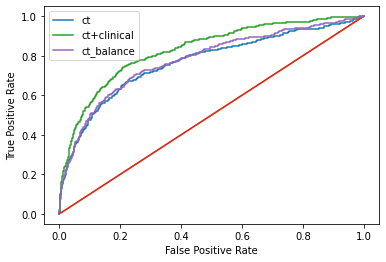

In [27]:
clf_ct = LogisticRegression(random_state=0, solver='liblinear').fit(x_ct, y_death)
porb_ct_death = clf_ct.predict_proba(x_death_ct)
porb_ct_ndeath = clf_ct.predict_proba(x_ndeath_ct)
pred_y = clf_ct.predict_proba(x_ct)
prob_y = [i[1] for i in pred_y]
fpr, tpr, thresholds = metrics.roc_curve(y_death, prob_y)
plt.plot(fpr, tpr, label='ct')
plt.plot([0,1],[0,1])
#clf.score(x_ctclinical, y_death)

clf_ctclinical = LogisticRegression(random_state=0, solver='liblinear').fit(x_ctclinical, y_death)
porb_ctclinical_death = clf_ctclinical.predict_proba(x_death_ctclinical)
porb_ctclinical_ndeath = clf_ctclinical.predict_proba(x_ndeath_ctclinical)
pred_y = clf_ctclinical.predict_proba(x_ctclinical)
prob_y = [i[1] for i in pred_y]
fpr, tpr, thresholds = metrics.roc_curve(y_death, prob_y)
plt.plot(fpr, tpr, label='ct+clinical')
plt.plot([0,1],[0,1])

clf_ct_bal = LogisticRegression(random_state=0, solver='liblinear').fit(x_ct_balance, y_death_balance)
porb_ct_death = clf_ct_bal.predict_proba(x_death_ct)
porb_ct_ndeath = clf_ct_bal.predict_proba(x_ndeath_ct)
pred_y = clf_ct_bal.predict_proba(x_ct)
prob_y = [i[1] for i in pred_y]
fpr, tpr, thresholds = metrics.roc_curve(y_death, prob_y)
plt.plot(fpr, tpr, label='ct_balance')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()